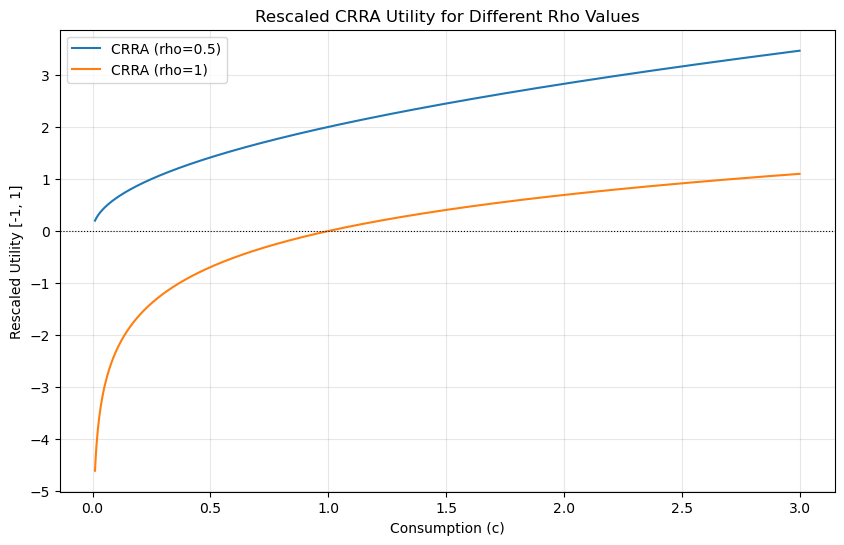

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# CRRA utility function
def crra_utility(c, rho):
    if rho == 1:
        return np.log(c)  # Log utility when rho = 1
    else:
        return ((c) ** (1 - rho)) / (1 - rho)

# Rescale the utility function to [-1, 1]
def rescale_crra(c, rho, c_min, c_max):
    # Compute CRRA utility for min and max consumption
    u_min = crra_utility(c_min, rho)
    u_max = crra_utility(c_max, rho)
    
    # Compute scaling factors A and B
    A = 2 / (u_max - u_min)
    B = -1 - A * u_min
    
    # Apply scaling
    u_scaled = A * crra_utility(c, rho) + B
    return u_scaled

# Example usage
c_values = np.linspace(0.01, 3.0, 1000)  # Example consumption values
c_min, c_max = 0.005, 2  # Range of consumption

# List of different risk aversion parameters (rho)
rho_values = [0.5, 1]

# Plot the rescaled CRRA utility functions for different rhos
plt.figure(figsize=(10, 6))

for rho in rho_values:
    u_scaled = rescale_crra(c_values, rho, c_min, c_max)
    u = crra_utility(c_values, rho)
    plt.plot(c_values, u, label=f"CRRA (rho={rho})")
    #plt.plot(c_values, u_scaled, label=f"Rescaled CRRA (rho={rho})")

# Add plot details
plt.xlabel("Consumption (c)")
plt.ylabel("Rescaled Utility [-1, 1]")
plt.title("Rescaled CRRA Utility for Different Rho Values")
plt.axhline(0, color="black", linestyle=":", linewidth=0.8)  # Reference line
plt.legend()
plt.grid(alpha=0.3)
plt.show()
